In [478]:
#install.packages("pacman",repos='http://cran.us.r-project.org')
library(pacman)
p_load(tidyverse, data.table, igraph)

In [479]:
source('distbasic.R')
source('sysfunc.R')
source('nwfunc.R')
source('priorfunc.R')

In [480]:
stdgrid = seq(1,200,2)/200
stdprior = data.table(f=1,p=stdgrid)

In [481]:
source('spvsfunc.R')
source('termfunc.R')

In [487]:
n = 15
sys = syscreate(n, seq(2,3,length.out = n), rbinom(n,1,0.5))
sys %>% addcol(sample(seq(1,4,length.out = n)), "soc")
pbreak = 0.1; a=3; k=1
nw = graph.formula() + vertices(1:n)
termlist = lapply(1:n, term)
supervisor = spvs()

In [ ]:
start =  proc.time()
memo = list()
for(i in 1:20){
    source('cycle.R')
}
end = proc.time()
end-start

In [486]:
memo[[10]]$sys$pref

[1] 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1

In [ ]:
log = list()
for(i in 1:100){
    source('cycle.R')
}

In [ ]:
log100 = log

In [475]:
log[[3]]

$nw
IGRAPH a4555d2 UN-- 15 19 -- 
+ attr: name (v/n)
+ edges from a4555d2 (vertex names):
 [1]  1--14  2--14  3-- 4  3-- 8  4--14  5--12  6-- 7  6--11  7-- 9  7--10
[11]  7--11  9--10  9--11 10--11 11--12 12--13  4-- 8  5--15  1-- 2

$newlink
[1] 1

$delink
[1] 1

$sys
      p rank id    alpha pref      soc x         y    report
 1: 0.5    1  9 3.000000    0 3.142857 1 0.8703001 0.3550000
 2: 0.5    2 10 2.928571    0 3.785714 1 0.9836097 0.3550000
 3: 0.5    3  7 2.857143    0 2.928571 1 0.7094112 0.3350000
 4: 0.5    4  2 2.785714    1 2.285714 1 0.7446255 0.9850000
 5: 0.5    5 11 2.714286    0 3.571429 1 0.7393797 0.3050000
 6: 0.5    6  6 2.642857    0 1.000000 1 0.7573354 0.2250000
 7: 0.5    7  1 2.571429    1 2.714286 1 0.6148231 0.9750000
 8: 0.5    8 14 2.500000    1 4.000000 1 0.6458910 0.9750000
 9: 0.5    9 13 2.428571    0 1.214286 1 0.7103961 0.0550000
10: 0.5   10 12 2.357143    0 2.500000 1 0.4576691 0.2250000
11: 0.5   11  4 2.285714    1 3.357143 1 0.2080371 0.965000

In [459]:
log[[3]]$guilty%>%newrank(n)

[1]  3  1  2  4  5  6  7  9  8 10 12 11 13 15 14

In [460]:
log[[3]]$guilty%>%newpos(n)

[1]  2  3  9 12 15

In [ ]:
temp = nw%>%timestep()
nw = temp[[1]]
obsgen(sys)
repos = sapply(termlist, report)
addcol(sys, repos, "report")
output = analysis(supervisor)
sys = penalize(sys, guilty)
termlist = update_term()

log[[i]] = list(
    nw = nw,
    sys = sys,
    termlist = termlist,
    supervisor = supervisor,
    newlink = temp[[2]],
    delink = temp[[3]],
    repos = repos,
    decision = output
    guilty = guilty,
    guiltyid = guiltyid
)

[1] 3
[1] 3


p,rank,id,alpha,pref,soc,x,y,report
0.5,1,12,3.000000,0,3.357143,1,0.7665361,0.00500000
0.5,2,15,2.928571,1,4.000000,1,0.6701555,0.73500000
0.5,3,1,2.857143,0,1.000000,1,0.2130617,0.08954685
0.5,4,2,2.785714,0,1.214286,1,0.5572809,0.00500000
0.5,5,14,2.714286,1,3.785714,1,0.5199546,0.78500000
0.5,6,7,2.642857,0,2.285714,1,0.8842495,0.01500000
0.5,7,9,2.571429,0,2.714286,1,0.5207550,0.41059674
0.5,8,8,2.500000,0,2.500000,1,0.3764844,0.01500000
0.5,9,11,2.428571,0,3.142857,1,0.9235125,0.47759956
0.5,10,3,2.357143,1,1.428571,1,0.5144282,0.84500000


[1] 0.2130617 0.1950000 0.9850000 0.1250000 0.9850000 0.9850000 0.1850000
 [8] 0.1750000 0.1650000 0.9850000 0.1750000 0.2250000 0.9950000 0.9950000
[15] 0.9850000

[1] 0

[1] 0.4462385 0.5055065 0.5025672 0.5202149 0.5120327 0.5213421 0.5000410
 [8] 0.5061423 0.4944147 0.5377112 0.5059648 0.5060635 0.4920761 0.5109086
[15] 0.5103286

integer(0)


p,rank,id,alpha,pref,soc,x,y,report
0.5,1,12,3.000000,0,3.357143,1,0.7665361,0.2250000
0.5,2,15,2.928571,1,4.000000,1,0.6701555,0.9850000
0.5,3,1,2.857143,0,1.000000,1,0.2130617,0.2130617
0.5,4,2,2.785714,0,1.214286,1,0.5572809,0.1950000
0.5,5,14,2.714286,1,3.785714,1,0.5199546,0.9950000
0.5,6,7,2.642857,0,2.285714,1,0.8842495,0.1850000
0.5,7,9,2.571429,0,2.714286,1,0.5207550,0.1650000
0.5,8,8,2.500000,0,2.500000,1,0.3764844,0.1750000
0.5,9,11,2.428571,0,3.142857,1,0.9235125,0.1750000
0.5,10,3,2.357143,1,1.428571,1,0.5144282,0.9850000


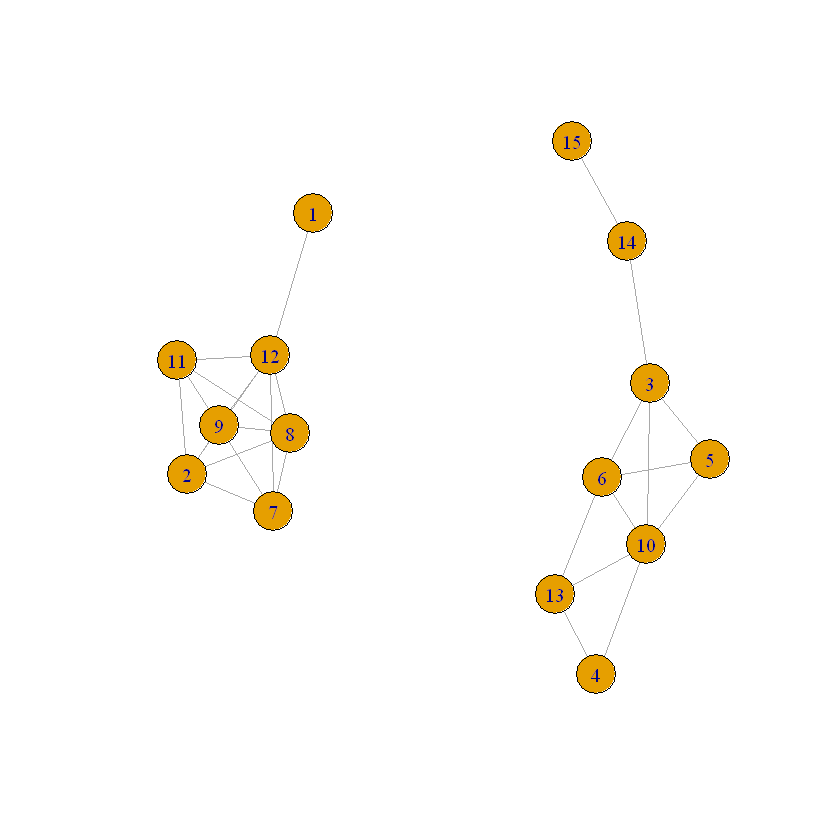

In [440]:
temp = nw%>%timestep()
nw = temp[[1]]
print(temp[[2]])
print(temp[[3]])
plot(nw)
obsgen(sys);sys
repos = sapply(termlist, report);repos
addcol(sys, repos, "report")
output = analysis(supervisor);output
sapply(termlist, bias)
print(guilty)
sys = penalize(sys, guilty);sys
termlist = update_term()